This is some code obtained from http://www.physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib notebook

Define the dy/df function

In [3]:
def f(y, t, params):
    theta, omega = y      # unpack current values of y
    Q, d, Omega = params  # unpack parameters
    derivs = [omega,      # list of dy/dt=f functions
             -omega/Q + np.sin(theta) + d*np.cos(Omega*t)]
    return derivs

In [10]:
# Parameters
Q = 2.0          # quality factor (inverse damping)
d = 0.0          # forcing amplitude
Omega = 0     # drive frequency

# Initial value
theta0 = 0.5     # initial angular displacement
omega0 = 0.0     # initial angular velocity

# Bundle parameters for ODE solver
params = [Q, d, Omega]

# Bundle initial conditions for ODE solver
y0 = [theta0, omega0]

# Make time array for solution
tStop = 20.
tInc = 0.05
t = np.arange(0., tStop, tInc)

<IPython.core.display.Javascript object>


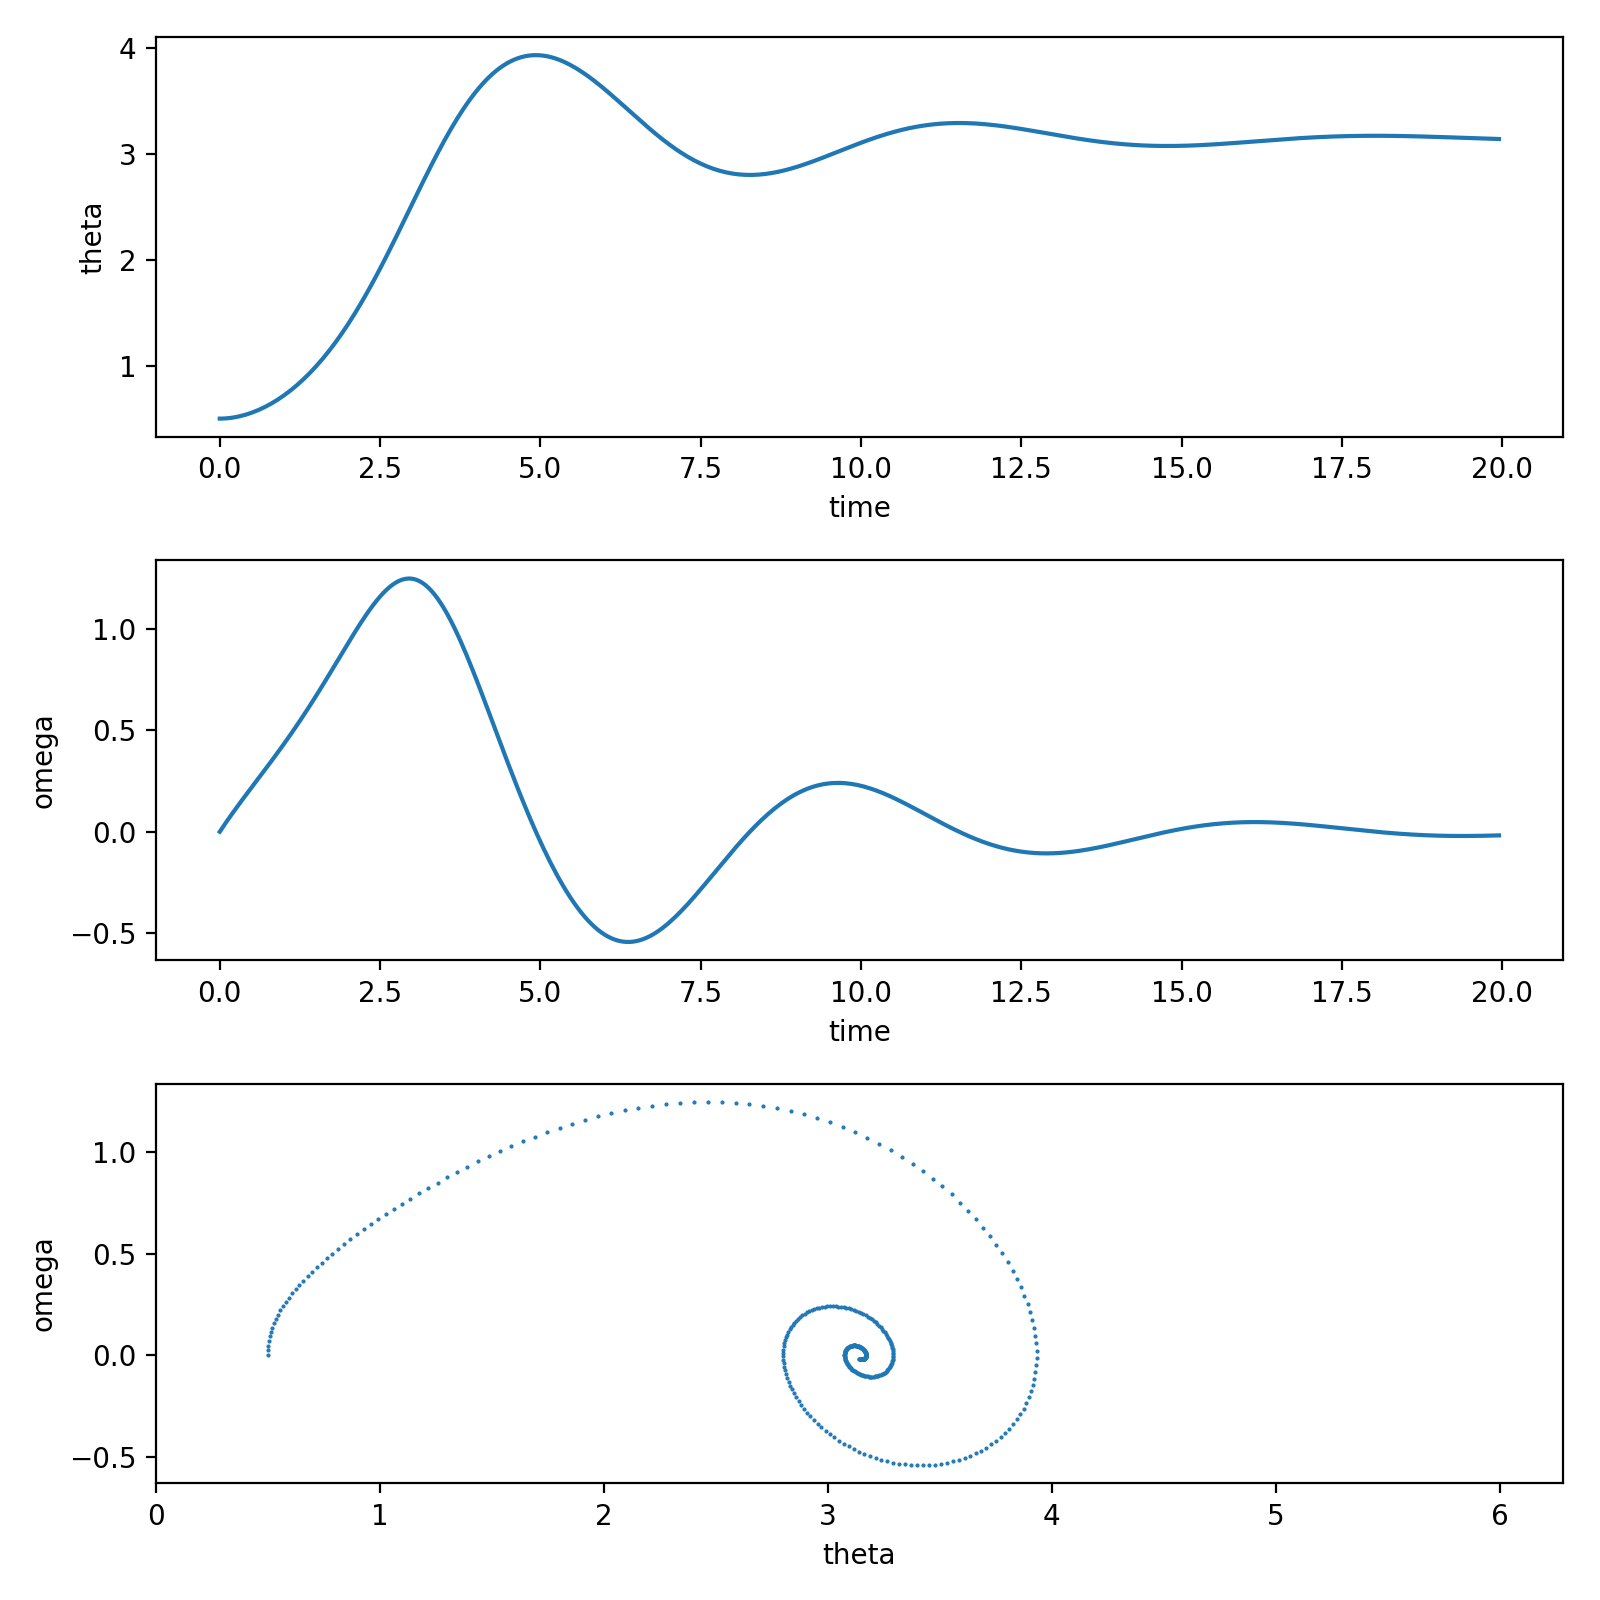

In [11]:
# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('omega')

# Plot omega vs theta
ax3 = fig.add_subplot(313)
twopi = 2.0*np.pi
ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
ax3.set_xlabel('theta')
ax3.set_ylabel('omega')
ax3.set_xlim(0., twopi)

plt.tight_layout()
plt.show()